# Swiss Food Composition Database - Exploratory Data Analysis

A straightforward initial exploration of the Swiss food composition database using Pandas, Matplotlib, and Seaborn.

**Dataset**: Swiss Federal Food Safety and Veterinary Office (FSVO) food composition database


In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## 1. Data Loading


In [15]:
# Load data
df = pd.read_excel('data/Swiss_food_composition_database.xlsx', sheet_name=0, skiprows=1)

# Use first row as column names
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)

print(f"Dataset shape: {df.shape}")


Dataset shape: (1190, 141)


## 2. Basic Overview


In [17]:
# Dataset shape
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Column info
print("\nColumn info:")
df.info()

# First few rows
print("\nFirst 5 rows:")
df.head()


Shape: 1190 rows × 141 columns

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Columns: 141 entries, ID to Record has changed
dtypes: object(141)
memory usage: 1.3+ MB

First 5 rows:


,ID,ID V 4.0,ID SwissFIR,Name,Synonyms,Category,Density,Matrix unit,"Energy, kilojoules (kJ)",Derivation of value,...,Iodide (I) (µg),Derivation of value,Source,Zinc (Zn) (mg),Derivation of value,Source,Selenium (Se) (µg),Derivation of value,Source,Record has changed
0,10533,NaN,NaN,Agar Agar,NaN,Various/Gelling and binding agents,NaN,per 100g edible portion,641,Automated calculation,...,n.d.,NaN,NaN,1.5,-,1473,n.d.,NaN,NaN,No
1,10536,NaN,NaN,Agave syrup,NaN,Sweets/Sugar and sweeteners,NaN,per 100g edible portion,1240,Automated calculation,...,n.d.,NaN,NaN,n.d.,NaN,NaN,n.d.,NaN,NaN,No
2,273,4500,841005,Almond,NaN,"Nuts, seeds and oleaginous fruit",NaN,per 100g edible portion,2580,Automated calculation,...,0.2,-,2238,3.3,-,2238,2.2,-,2238,Yes
3,14113,NaN,NaN,"Almond drink, plain",NaN,Plant based protein foods and alternaives to a...,1,per 100g edible portion,139,Automated calculation,...,0.4,-,3200,0.1,-,2277;3200,0.2,-,3200,Yes
4,14131,NaN,NaN,"Almond drink, plain, with calcium and vitamin ...",NaN,Plant based protein foods and alternaives to a...,1,per 100g edible portion,139,Automated calculation,...,0.4,Estimation,NaN,0.1,Estimation,NaN,0.2,Estimation,NaN,Yes


## 3. Missing Values & Duplicates


In [18]:
# Missing values per column (sorted descending)
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column (top 10):")
print(missing_values.head(10))

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Missing data percentage
missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"Total missing data: {missing_pct:.1f}% of all cells")


Missing values per column (top 10):
0
Source      1190
Source      1190
Source      1190
Source      1190
Synonyms    1185
Source      1185
Source      1183
Density     1033
Source       832
Source       783
dtype: int64

Duplicate rows: 0
Total missing data: 21.0% of all cells


## 4. Summary Statistics for Numeric Columns


In [19]:
# Convert nutritional columns to numeric
nutritional_cols = ['Energy, kilocalories (kcal)', 'Protein (g)', 'Fat, total (g)', 
                   'Carbohydrates, available (g)', 'Dietary fibres (g)', 'Sugars (g)']

# Convert to numeric, replacing non-numeric values with NaN
for col in nutritional_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Summary statistics
print("Summary statistics for key nutritional columns:")
available_cols = [col for col in nutritional_cols if col in df.columns]
df[available_cols].describe().T


Summary statistics for key nutritional columns:


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
"Energy, kilocalories (kcal)",1190.0,214.445378,178.048037,0.0,79.0,161.0,318.75,900.0
Protein (g),1188.0,9.479966,8.955549,0.0,2.0,6.7,15.50,51.5
"Fat, total (g)",1182.0,11.314552,17.743403,0.0,0.9,4.6,13.40,100.0
"Carbohydrates, available (g)",1185.0,17.192489,22.280173,0.0,0.9,7.3,23.80,100.0
Dietary fibres (g),1167.0,2.501371,4.768854,0.0,0.0,1.3,2.80,74.1
Sugars (g),1165.0,7.002489,14.395413,0.0,0.3,1.6,6.10,100.0


## 5. Visualizations - Key Nutrients


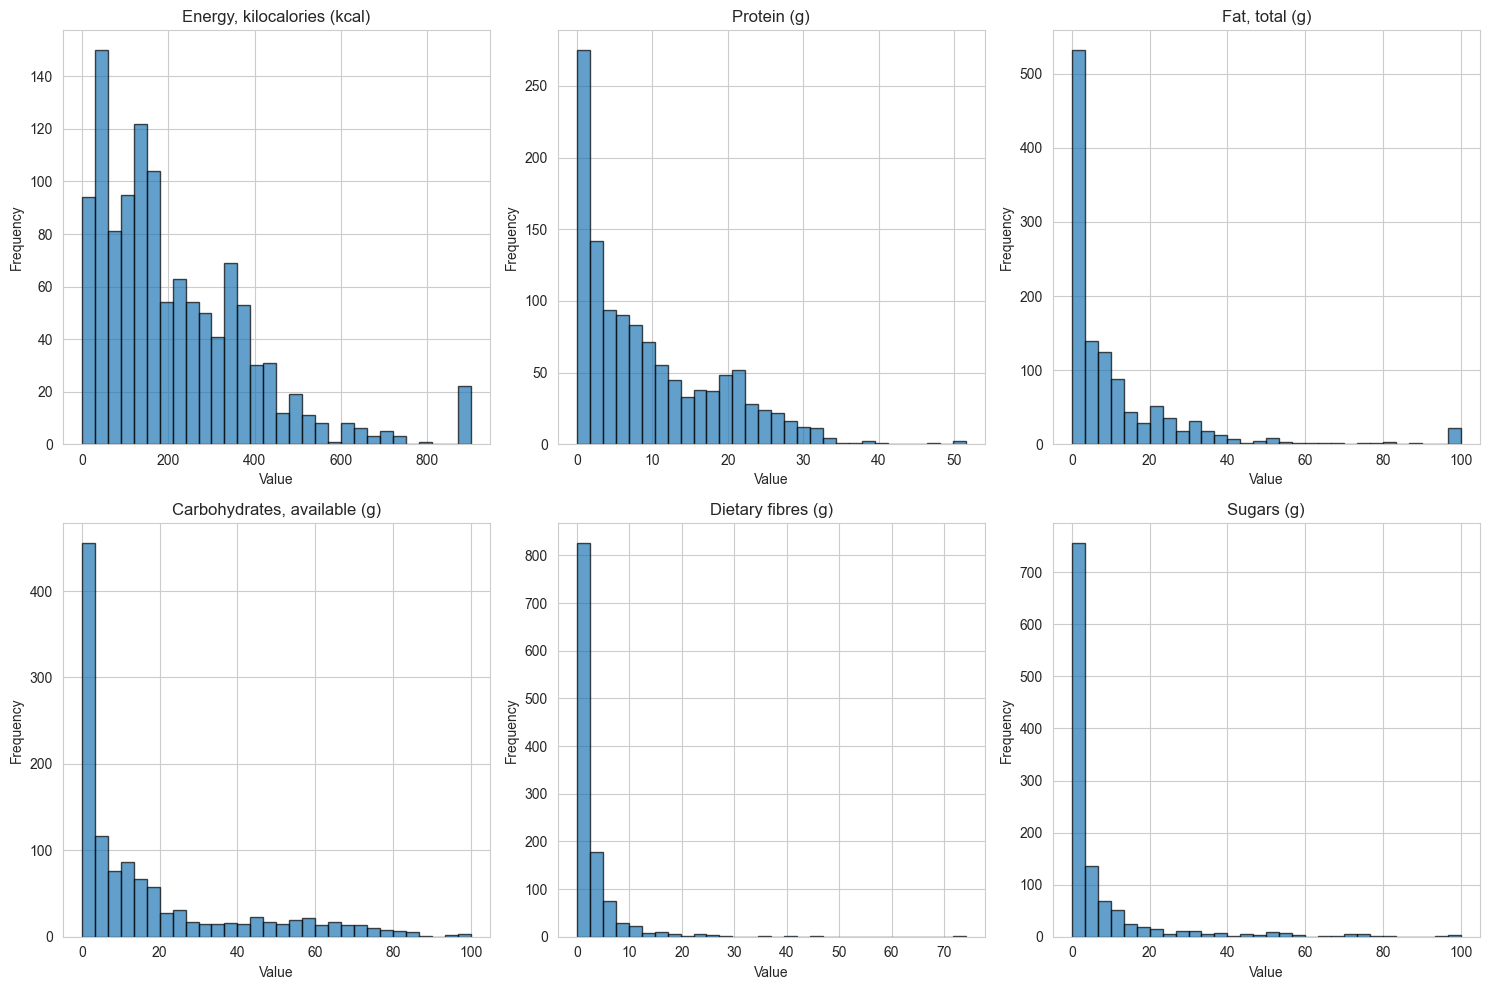

In [20]:
# Histograms for key nutrients
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(available_cols):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

# Hide unused subplots
for i in range(len(available_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


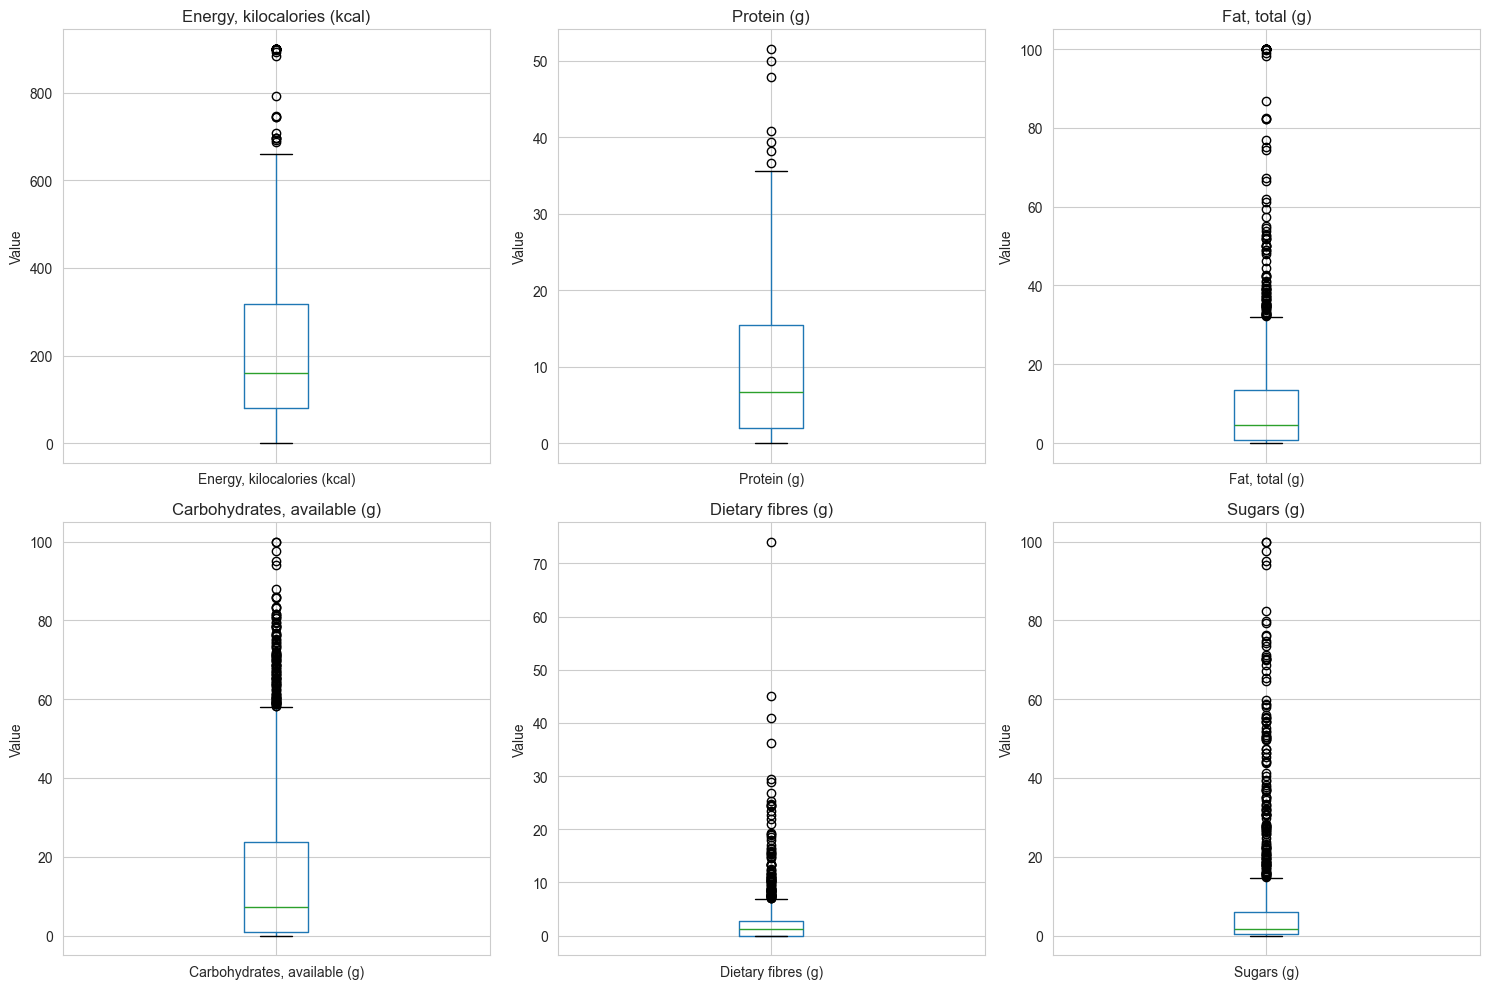

In [21]:
# Boxplots for key nutrients
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(available_cols):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_ylabel('Value')

# Hide unused subplots
for i in range(len(available_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## 6. Correlation Analysis


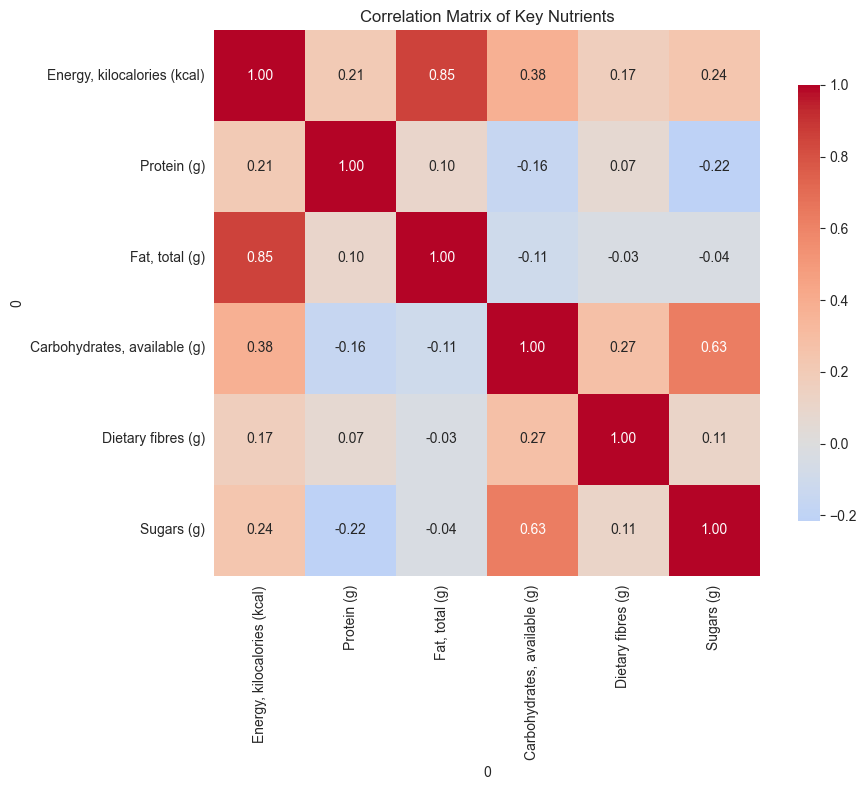

In [22]:
# Compute correlation matrix for key nutrients
correlation_matrix = df[available_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Nutrients')
plt.tight_layout()
plt.show()


## 7. Food Categories Overview


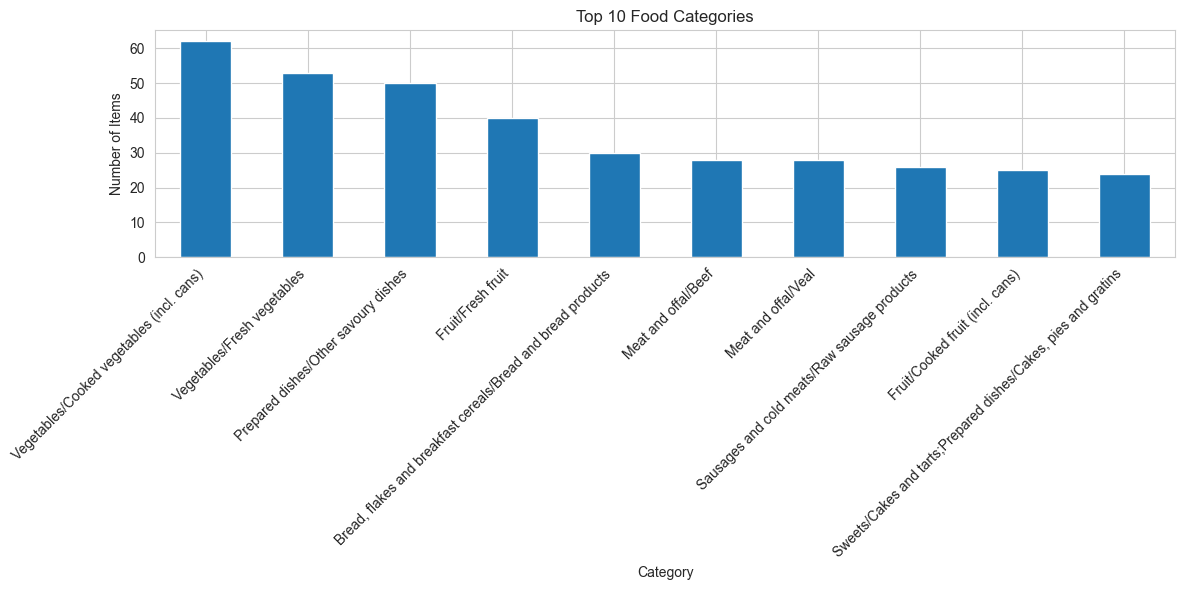

Total categories: 130

Top 5 categories:
Category
Vegetables/Cooked vegetables (incl. cans)                       62
Vegetables/Fresh vegetables                                     53
Prepared dishes/Other savoury dishes                            50
Fruit/Fresh fruit                                               40
Bread, flakes and breakfast cereals/Bread and bread products    30
Name: count, dtype: int64


In [23]:
# Food categories distribution
if 'Category' in df.columns:
    category_counts = df['Category'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar')
    plt.title('Top 10 Food Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Items')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"Total categories: {df['Category'].nunique()}")
    print(f"\nTop 5 categories:")
    print(category_counts.head())


## 8. Summary


In [24]:
print("=== EXPLORATORY DATA ANALYSIS SUMMARY ===")
print(f"\n📊 Dataset Overview:")
print(f"   • Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🔍 Data Quality:")
print(f"   • Missing data: {missing_pct:.1f}% of all cells")
print(f"   • Duplicate rows: {duplicates}")
print(f"   • Complete rows: {df.dropna().shape[0]:,} ({(df.dropna().shape[0]/df.shape[0]*100):.1f}%)")

print(f"\n🍎 Nutritional Data:")
print(f"   • Key nutritional columns analyzed: {len(available_cols)}")
print(f"   • Columns: {', '.join(available_cols)}")

if 'Category' in df.columns:
    print(f"\n📂 Food Categories:")
    print(f"   • Total categories: {df['Category'].nunique()}")
    print(f"   • Most common: {df['Category'].value_counts().index[0]} ({df['Category'].value_counts().iloc[0]} items)")

print(f"\n✅ Analysis complete! Dataset ready for further analysis.")


=== EXPLORATORY DATA ANALYSIS SUMMARY ===

📊 Dataset Overview:
   • Shape: 1,190 rows × 141 columns
   • Memory usage: 7.65 MB

🔍 Data Quality:
   • Missing data: 21.0% of all cells
   • Duplicate rows: 0
   • Complete rows: 0 (0.0%)

🍎 Nutritional Data:
   • Key nutritional columns analyzed: 6
   • Columns: Energy, kilocalories (kcal), Protein (g), Fat, total (g), Carbohydrates, available (g), Dietary fibres (g), Sugars (g)

📂 Food Categories:
   • Total categories: 130
   • Most common: Vegetables/Cooked vegetables (incl. cans) (62 items)

✅ Analysis complete! Dataset ready for further analysis.
